# KITTI Data Analysis

## Include
* data parsing and visualization
* dataset class for pytorch

## Reference
* https://github.com/whatdhack/computer_vision/blob/af151108614a832f847c573ed39e8f3f74d74a5a/kitti_3dobj_det_chk/kitti_3dobj_det_chk.py
* https://github.com/bostondiditeam/kitti/blob/master/tools/2D_BBox.ipynb

In [21]:
%cd /home/kyungpyo/git/voxelnet
%pip install -e .

/home/kyungpyo/git/voxelnet
Obtaining file:///home/kyungpyo/git/voxelnet
  Attempting uninstall: box-overlaps
    Found existing installation: box-overlaps 0.0.0
    Uninstalling box-overlaps-0.0.0:
      Successfully uninstalled box-overlaps-0.0.0
  Running setup.py develop for box-overlaps
Note: you may need to restart the kernel to use updated packages.


In [22]:
%load_ext autoreload
%autoreload 2
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from data.kitti.utils import *
from visualization.plotly_wrapper import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
path = pathlib.Path.cwd() / 'data'/'validation'
image, lidar, calib, label = getDataFromPath(path, 7479)
# image, lidar, calib, label = getDataFromPath(path, 0)
# image, lidar, calib, label = getDataFromPath(path, 17)
# image, lidar, calib, label = getDataFromPath(path, 18)
# image, lidar, calib, label = getDataFromPath(path, 22)
# image, lidar, calib, label = getDataFromPath(path, 26)
parseLabelData(label, calib)

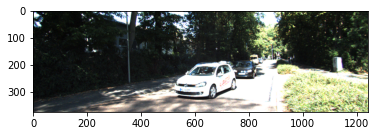

In [24]:
plt.imshow(image)
plt.show()

# import plotly.express as px
# px.imshow(image)

In [27]:
lidar_dict = {
    'x': lidar[:,0],
    'y': lidar[:,1],
    'z': lidar[:,2],
    'i': lidar[:,3],
}
pointcloud = goScatterLidar(lidar_dict)
data = [pointcloud]

for key in label.keys():
    if key == 'Car':
        for box in label[key]:
            data.append(goCube(box))

layout = goLayout('lidar point cloud with label')
goFigure(data, layout)